## sklearn中的单变量特征选择

单变量的特征选择是通过基于一些单变量的统计度量方法来选择最好的特征，比如卡方检测等。`Scikit-learn` 将单变量特征选择的学习器作为实现了 `transform `方法的对象：

**sklearn中实现的方法有:**

 - [SelectKBest](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) 保留评分最高的 K 个特征
 - [SelectPercentile](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) 保留最高得分百分比之几的特征
 - 对每个特征应用常见的单变量统计测试: 假阳性率（false positive rate） [SelectFpr](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr), 伪发现率（false discovery rate） [SelectFdr](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.feature_selection.SelectFdr.html#sklearn.feature_selection.SelectFdr) , 或者族系误差（family wise error） [SelectFwe](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.feature_selection.SelectFwe.html#sklearn.feature_selection.SelectFwe) 。
 - [GenericUnivariateSelect](http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect) 允许使用可配置方法来进行单变量特征选择。它允许超参数搜索评估器来选择最好的单变量特征。
 
 
这些对象将得分函数作为输入，返回单变量的得分和 p 值 （或者仅仅是 SelectKBest 和 SelectPercentile 的分数）:

 - 对于回归: f_regression , mutual_info_regression
 - 对于分类: chi2 , f_classif , mutual_info_classif
 
这些基于 `F-test` 的方法计算两个随机变量之间的线性相关程度。另一方面，`mutual information methods`（[mutual information : 互信息](https://baike.baidu.com/item/%E4%BA%92%E4%BF%A1%E6%81%AF/7423853?fr=aladdin&fromid=11219235&fromtitle=Mutual+Information)）能够计算任何种类的统计相关性，但是作为非参数的方法，互信息需要更多的样本来进行准确的估计。


**稀疏数据的特征选择**

如果你使用的是稀疏的数据 (例如数据可以由稀疏矩阵来表示),
    chi2 , mutual_info_regression , mutual_info_classif 可以处理数据并保持它的稀疏性。
    

*以上文字主要来自于[ApacheCN](http://www.apachecn.org/)的sklearn0.19的用户手册的翻译,略有修改*

## 例子
### 简单使用

In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
print("X.shape : ",X.shape)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y) # k=2 保留两个特征
print("X_new.shape : ",X_new.shape)
X_new_2 = SelectPercentile(score_func=chi2, percentile=75).fit_transform(X,y) # percentile=75 保留75%
print("X_new_2.shape : ",X_new_2.shape)

X.shape :  (150, 4)
X_new.shape :  (150, 2)
X_new_2.shape :  (150, 3)


### Comparison of F-test and mutual information

F-test 与 mutual information 的比较,这个例子说明了单变量F检验统计量和互信息量之间的差异。

我们考虑3个特征x_1，x_2，x_3在[0,1]上均匀分布，目标依赖于它们如下：

y = x_1 + sin（6 * pi * x_2）+ 0.1 * N（0,1），即第三个特征是完全不相关的。

下面的代码绘制了y对个体x_i的依赖性和单变量F检验统计量和互信息的归一化值。由于F检验仅捕获线性依赖性，因此将x_1作为最具有判别力的特征。另一方面，互信息可以捕捉变量之间的任何依赖关系，并将x_2作为最具有判别力的特征，这可能与我们对这个例子的直观认识更为一致。这两种方法都正确地将x_3标记为无关紧要。

但是与方差过滤同样的在于,很多时候去除了低指标的数据之后,并不一定代表这性能的上升,甚至可能是下降。这主要取决于你选择的统计函数。

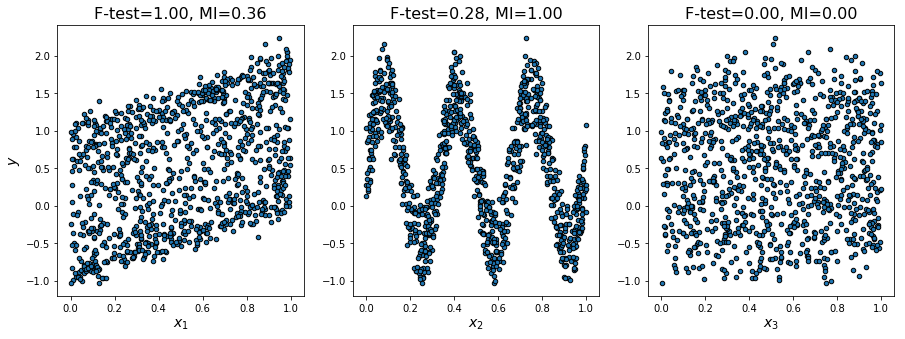

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

### 其他例子

除了上面的两个例子外,sklearn的官网还给出了一个多项式核的非线性支持向量机的例子[Univariate Feature Selection](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py),其证明了单变量特征选择在多项式核的非线性支持向量机的实际作用是让原模型将注意力更多地放在了更重要的特征上,其与多项式核的非线性支持向量机本身所得到的特征重要程度的对比同样有着微妙的联系.原文点[这里](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py)

## 参考

 - [sklearn官方文档:Univariate Feature Selection](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py)
 - [sklearn官方文档:Comparison of F-test and mutual information](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)
 - [sklearn ApacheCN 官方翻译](http://sklearn.apachecn.org/cn/0.19.0/modules/feature_selection.html)